In [11]:
%matplotlib inline



import pandas as pd
import requests
import re
import ast
import numpy as np
import seaborn as sns

from collections import defaultdict


In [12]:
ccc_df = pd.read_csv("data/ccc_blm.csv")
ele_df = pd.read_csv("data/ele.csv")
cl_df = pd.read_csv("data/cl_blm.csv")
nyt_df = pd.read_csv("data/nytimes_blm.csv")

wiki_df = pd.read_csv("data/wiki_blm.csv")


dfs = [ccc_df, ele_df, cl_df, wiki_df, nyt_df]

In [13]:
df = pd.concat(dfs).reset_index(drop=True)
display(df)

,id,date,city_st,location,size,size_str,urls,collection,Unnamed: 0
0,NaN,2020-05-25,"Tulsa, OK","Interstate 44, Tulsa, OK",NaN,NaN,['https://kfor.com/news/local/protester-hit-by...,CCC,NaN
1,NaN,2020-05-30,"Jacksonville, FA","Downtown, Jacksonville, FA",2000.0,thousands,['https://www.news4jax.com/news/local/2020/05/...,CCC,NaN
2,NaN,2020-05-26,"Hammond, IN","Hammond Police Department, Hammond, IN",NaN,NaN,['https://www.nwitimes.com/news/local/watch-no...,CCC,NaN
3,NaN,2020-05-26,"Houston, TX","Discovery Green, Houston, TX",NaN,NaN,['https://www.houstonchronicle.com/news/housto...,CCC,NaN
4,NaN,2020-05-26,"Los Angeles, CA","Downtown, Los Angeles, CA",NaN,NaN,['number of arrests and participant injuries u...,CCC,NaN
...,...,...,...,...,...,...,...,...,...
11198,NaN,06/08/2020,"Tupper Lake, NY",NaN,NaN,NaN,['https://www.adirondackdailyenterprise.com/ne...,New York Times,NaN
11199,NaN,06/08/2020,"Delmar, NY",NaN,NaN,NaN,['https://www.timesunion.com/news/article/Rall...,New York Times,NaN
11200,NaN,06/08/2020,"Clifton Park, NY",NaN,NaN,NaN,['https://cbs6albany.com/news/local/high-schoo...,New York Times,NaN
11201,NaN,06/08/2020,"Claremont, NH",NaN,NaN,NaN,['https://www.youtube.com/watch?v=gR8IeATEUzY'],New York Times,NaN


In [14]:
df['collection'].value_counts()

CCC               3453
Count Love        3418
New York Times    2633
Wikipedia          919
Elephrame          780
Name: collection, dtype: int64

In [15]:
pd.to_datetime(df['date'], errors='ignore').dropna().sort_values()

7790   2002-06-01
4233   2017-02-28
4234   2017-03-06
4235   2017-03-07
4236   2017-03-19
          ...    
3452   2020-06-27
8565   2030-05-29
8505   2031-05-30
8561   2031-05-30
7676   2040-06-01
Name: date, Length: 11069, dtype: datetime64[ns]

In [16]:
date_start = pd.to_datetime('2020-05-25')
df = df[pd.to_datetime(df['date'], errors='ignore') > date_start].copy()
df = df[pd.to_datetime(df['date'], errors='ignore') <= pd.Timestamp.today()].copy()


In [17]:
df['date'] = pd.to_datetime(df['date']).dt.date
df['date'].value_counts()

2020-05-31    1357
2020-05-30    1156
2020-06-01    1039
2020-06-02     978
2020-06-06     954
2020-06-03     795
2020-06-05     661
2020-06-07     602
2020-06-04     581
2020-05-29     418
2020-06-13     318
2020-06-19     292
2020-06-14     216
2020-06-12     211
2020-06-08     179
2020-05-28     142
2020-06-09     111
2020-06-10     105
2020-06-11      87
2020-06-16      39
2020-06-18      36
2020-06-17      36
2020-05-27      33
2020-06-15      33
2020-05-26      21
2020-06-21      20
2020-06-20      20
Name: date, dtype: int64

In [18]:
# fix stay commas

df['city_st'] = df['city_st'].str.replace(' , ', ', ')
df['city_st'] = df['city_st'].str.strip()


len(df)

10440

In [19]:
# eliminate non US events

countries = [
    "Finland",
    "England", "France", "Germany",
    "Wales",
    "Canada",
    "Scotland", 'Sweden', 'Ottowa'
    "Germany", "Netherlands"
    "Ireland", 'Sweden'
    "Netherlands",
    "New Zealand",
    "Denmark",
    "Australia",
    "Belgium", "Uganda", 'Croatia'
    "France", 'Hungary',
]


def in_us(city_st):
    for c in countries:
        c2 = "," + c
        if c2.lower() in city_st.lower().replace(' ',''):
            print(city_st)
            return False

    return True


df = df[df["city_st"].apply(in_us)].copy()
len(df)

Haverfordwest, Wales
British Columbia, Canada
Québec, Canada
Manitoba, Canada
Alberta, Canada
Welwyn Garden City, England
Aberdeen, Scotland
Brighton, England
Ulm, Germany
London, England
Guildford, England
Nova Scotia, Canada
Kampala, Uganda
Crawley, England
Cheltenham, England
Cologne, Germany
Bonn, Germany
Coventry, England
Coventry, England
Horsham, England
Northwest Territories, Canada
Brussels, Belgium
Budapest, Hungary
Cairns, Australia
London, England
London, England
Bristol, England
Glasgow, Scotland
Edinburgh, Scotland
Flensburg, Germany
Cologne, Germany
Bonn, Germany
Hamburg, Germany
Munich, Germany
Berlin, Germany
Alberta, Canada
Saskatchewan, Canada
London, England
Alberta, Canada
Redditch, England
London, England
Ontario, Canada
Canberra, Australia
Alberta, Canada
Lincoln, England
Hull, England
London, England
Helsinki, Finland
Alberta, Canada
Alberta, Canada
Stockholm, Sweden
London, England
Alberta, Canada
Alberta, Canada
Paris, France
Halifax, Canada


10384

In [20]:
errors = {'Albuqeurque, NM' : 'Albuquerque, NM',
         'Bilings, MT' : 'Billings, MT',
         'Breckinridge, CO' : 'Breckinridge, CO',
          "Longbranch, NJ" : "Long Branch, NJ",
          'Lousiville, KY' : 'Louisville, KY',
          'Merrick, New York' : 'Merrick, NY',
          'Pittsfield Charter Township, MI' : 'Pittsfield, MI',
          'Pittsfield Township, MI' : 'Pittsfield, MI',
          'Phillipsburg, PA' : 'Philipsburg, PA',
          'South Sacramento, CA' :  'Sacramento, CA',
          'Shelbourne Falls, MA' : 'Shelburne Falls, MA',
          'Tallahasee, FL' : 'Tallahassee, FL',
          'Tampa Bay, FL' : "Tampa, Fl",
          'Voorhees Township, NJ' : 'Voorhees, NJ',
          'Warren Township, NJ' : 'Warren, NJ', 
          'Summerlin, NV' : 'Las Vegas, NV',
          'Stockton, TX' : 'Fort Stockton, TX',
          'Standford, CA' : 'Stanford, CA',
        
          
         }

for city in errors:
    df['city_st'] = df['city_st'].str.replace(city, errors[city])

In [21]:
#uniform saint to st
df['city_st'] = df['city_st'].str.replace('Saint ', 'St. ')

In [22]:
df['events'] = 1
df['size'] = df['size'].replace(0,np.nan)
df['size_imp'] = df['size'].fillna(11)


df = pd.concat([df, pd.get_dummies(df['collection'])], axis=1)

In [27]:
df['size'] = df['size'].replace({'20,000': 20000,
                                '200-300': 220,
                                '$1,000.00' : np.nan,
                                'hundreds': 200,
                                'a  large crowd': np.nan})

In [28]:
df['size'] = df['size'].astype(float)

In [29]:
# extract urls to make them variables

def str_2_list(links):
    return ast.literal_eval(links)

df['url_list'] = df['urls'].apply(str_2_list)


urls = set([item for sublist in df['url_list'].values for item in sublist])

for url in urls:
    df[url] = df['urls'].str.contains(url)

/Users/nealcaren/opt/anaconda3/envs/tmwp/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


First Pass at Aggregation

In [30]:
# first sum by collection for multiple events by city
df_cd = df.groupby(['collection', 'date', 'city_st']).sum().reset_index()

In [31]:
df_cd['size_imp'] = df_cd['size'].fillna(11)

In [32]:
for v in ["CCC", 
    "Count Love", 
    "Elephrame",
         "Wikipedia",
         "New York Times"]:
    df_cd[v] = df_cd[v] > 0
    df_cd[v] = df_cd[v].astype(int)

In [33]:

aggregation = {
    "events": "max",
    "size": "max",
    "size_imp" : "max",
    "CCC" : "max",
    "Wikipedia" : "max",
    "Count Love" : "max",
    "Elephrame" : "max",
    "New York Times": "max"
}


for url in urls:
    aggregation[url] = 'max'

df_cd = df_cd.groupby(["date", "city_st"]).agg(aggregation).reset_index()

In [34]:
# Create list of URLs

index_dict = defaultdict(list)

http_urls = [u for u in df_cd.keys() if 'http' in u]

for url in http_urls:
    for i in df_cd[df_cd[url] == True].index.values:
        index_dict[i].append(url)

url_df = pd.Series(index_dict).to_frame(name='urls')



In [35]:
keep = [
    "date",
    "city_st",
    "events",
    "size",
    "size_imp",
    "CCC",
    "Count Love",
    "Elephrame",
    "New York Times",
    "Wikipedia"

]

In [36]:
df_cd = df_cd[keep].merge(url_df, left_index=True, right_index=True)

In [37]:
df_cd['size'] = df_cd['size'].replace(0, np.nan)
df_cd['size_imp'] = df_cd['size'].replace(0, np.nan)
df_cd['size_imp'] = df_cd['size'].fillna(11)

In [38]:


df_cd.to_csv('../BLM-GFAABT.csv', index =False)




In [39]:
temp = df_cd.groupby(['date','city_st']).agg({'events': 'count',
                                            'Elephrame' : 'max',
                                            'CCC': 'max',
                                            'Count Love': 'max',
                                              "New York Times" : 'max',
                                             'Wikipedia' : 'max'}).reset_index()

temp['cities'] = temp['events']
print(temp.groupby('date')[['cities','Elephrame','CCC','Count Love', 'New York Times', 'Wikipedia']].sum().to_markdown())

| date       |   cities |   Elephrame |   CCC |   Count Love |   New York Times |   Wikipedia |
|:-----------|---------:|------------:|------:|-------------:|-----------------:|------------:|
| 2020-05-26 |       11 |           1 |     6 |            7 |                6 |           0 |
| 2020-05-27 |       20 |           0 |    11 |           11 |               11 |           0 |
| 2020-05-28 |       63 |           0 |    41 |           41 |               41 |           8 |
| 2020-05-29 |      183 |           0 |   123 |          131 |               94 |          38 |
| 2020-05-30 |      480 |           0 |   277 |          346 |              337 |         126 |
| 2020-05-31 |      667 |           2 |   247 |          439 |              460 |         155 |
| 2020-06-01 |      564 |          43 |   205 |          330 |              330 |          90 |
| 2020-06-02 |      551 |          41 |   194 |          325 |              296 |          55 |
| 2020-06-03 |      462 |          71 | 

In [40]:
display("Cities:", len(df_cd['city_st'].value_counts()))

'Cities:'

3005

In [41]:
print(df_cd.groupby('date')['events'].sum().to_markdown())

| date       |   events |
|:-----------|---------:|
| 2020-05-26 |       12 |
| 2020-05-27 |       20 |
| 2020-05-28 |       73 |
| 2020-05-29 |      211 |
| 2020-05-30 |      540 |
| 2020-05-31 |      704 |
| 2020-06-01 |      591 |
| 2020-06-02 |      590 |
| 2020-06-03 |      498 |
| 2020-06-04 |      408 |
| 2020-06-05 |      435 |
| 2020-06-06 |      639 |
| 2020-06-07 |      409 |
| 2020-06-08 |      134 |
| 2020-06-09 |       86 |
| 2020-06-10 |       78 |
| 2020-06-11 |       71 |
| 2020-06-12 |      177 |
| 2020-06-13 |      255 |
| 2020-06-14 |      173 |
| 2020-06-15 |       23 |
| 2020-06-16 |       31 |
| 2020-06-17 |       27 |
| 2020-06-18 |       20 |
| 2020-06-19 |      232 |
| 2020-06-20 |        8 |
| 2020-06-21 |        3 |


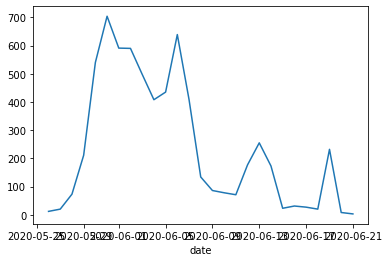

In [42]:
df_cd.groupby('date')['events'].sum().plot();

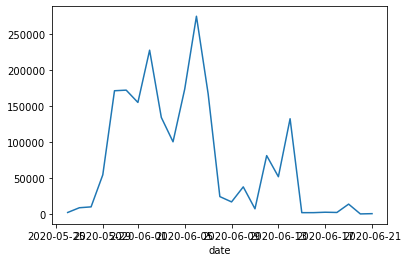

In [43]:
df_cd.groupby('date')['size_imp'].sum().plot();

In [44]:
df_cd['size_imp'].count()

5833

In [45]:
display('Events:',df_cd['events'].sum())

'Events:'

6448

In [46]:
display("Size:",df_cd['size_imp'].sum())

'Size:'

2028900.35

In [47]:


df_cd['size'].describe()

count     3284.000000
mean       609.275685
std       2391.575710
min          1.000000
25%        100.000000
50%        200.000000
75%        400.000000
max      60200.000000
Name: size, dtype: float64

In [48]:
display(df_cd.groupby(["CCC", "Count Love", 'Elephrame','New York Times','Wikipedia'])['events'].count().reset_index())

,CCC,Count Love,Elephrame,New York Times,Wikipedia,events
0,0,0,0,0,1,112
1,0,0,0,1,0,960
2,0,0,0,1,1,121
3,0,0,1,0,0,251
4,0,0,1,0,1,3
5,0,0,1,1,0,27
6,0,0,1,1,1,10
7,0,1,0,0,0,1040
8,0,1,0,0,1,33
9,0,1,0,1,0,442


In [49]:
df_cd['city_st'].value_counts().to_frame().reset_index().sort_values(by='index').to_csv('cities.csv')